In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Load the dataset
data = pd.read_csv(r'./dataset.csv')

: 

In [47]:
# print unique values in each column
for column in data.columns:
    print(column, data[column].unique())

Marital status [1 2 4 3 5 6]
Application mode [ 8  6  1 12  9 17 15 16 14  4 13  7  3  2  5 18 10 11]
Application order [5 1 2 4 3 6 9 0]
Course [ 2 11  5 15  3 17 12 10 14 16  6  8 13  9  4  1  7]
Daytime/evening attendance [1 0]
Previous qualification [ 1 12 16 14  8  3 15  2  4  9 17 11  6  7 13  5 10]
Nacionality [ 1 15  3 14 12 18  5 11  8 17  4  9 13 16 10 21  2 20 19  6  7]
Mother's qualification [13  1 22 23  3  4 27  2 19 10 25  7  5 24  9 26 18 11 20 21  6  8 17 28
 12 14 16 15 29]
Father's qualification [10  3 27 28  1 14  5  4 24  2 29  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
Mother's occupation [ 6  4 10  8  5  2 16  1  7  3 12  9 20 28 13 29 23 32 30 18 24 19 11 21
 15 27 31 14 22 17 26 25]
Father's occupation [10  4  8 11  6  9  5  2  3 22  7  1 12 39 19 13 29 46 43 34 44 30 41 24
 23 45 35 26 28 36 16 37 31 42 20 15 40 25 21 17 32 38 27 18 14 33]
Displaced [1 0]
Educational special needs [0 1]
Debtor [0 1]
Tuition fees up to date [1 0]
Gend

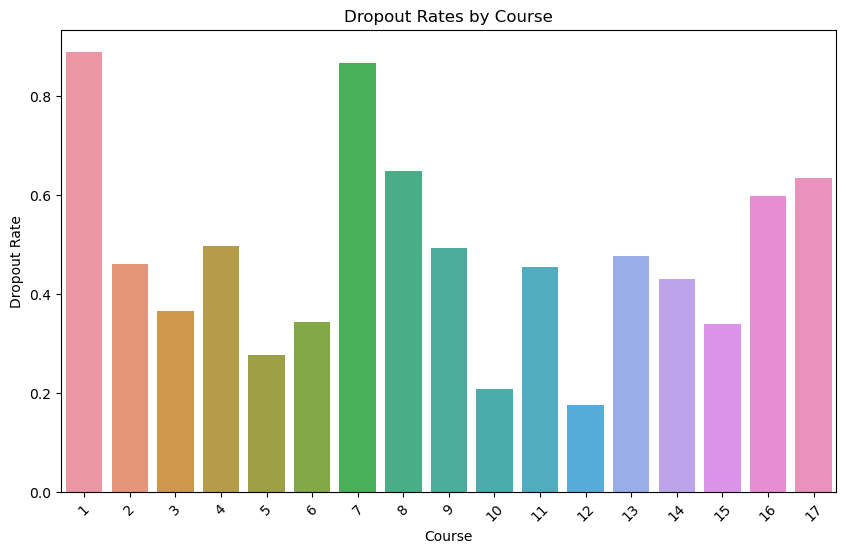

In [48]:
# Assuming 'Course' is the column with the names of the courses and 'Target' column indicates if a student has dropped out
# Group by 'Course' and 'Target', and count the occurrences
course_dropout_data = data.groupby(['Course', 'Target']).size().unstack(fill_value=0)

# Calculate dropout rate for each course
course_dropout_data['Dropout Rate'] = course_dropout_data['Dropout'] / (course_dropout_data['Dropout'] + course_dropout_data['Graduate'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=course_dropout_data.index, y='Dropout Rate', data=course_dropout_data)
plt.title('Dropout Rates by Course')
plt.ylabel('Dropout Rate')
plt.xlabel('Course')
plt.xticks(rotation=45)
plt.show()

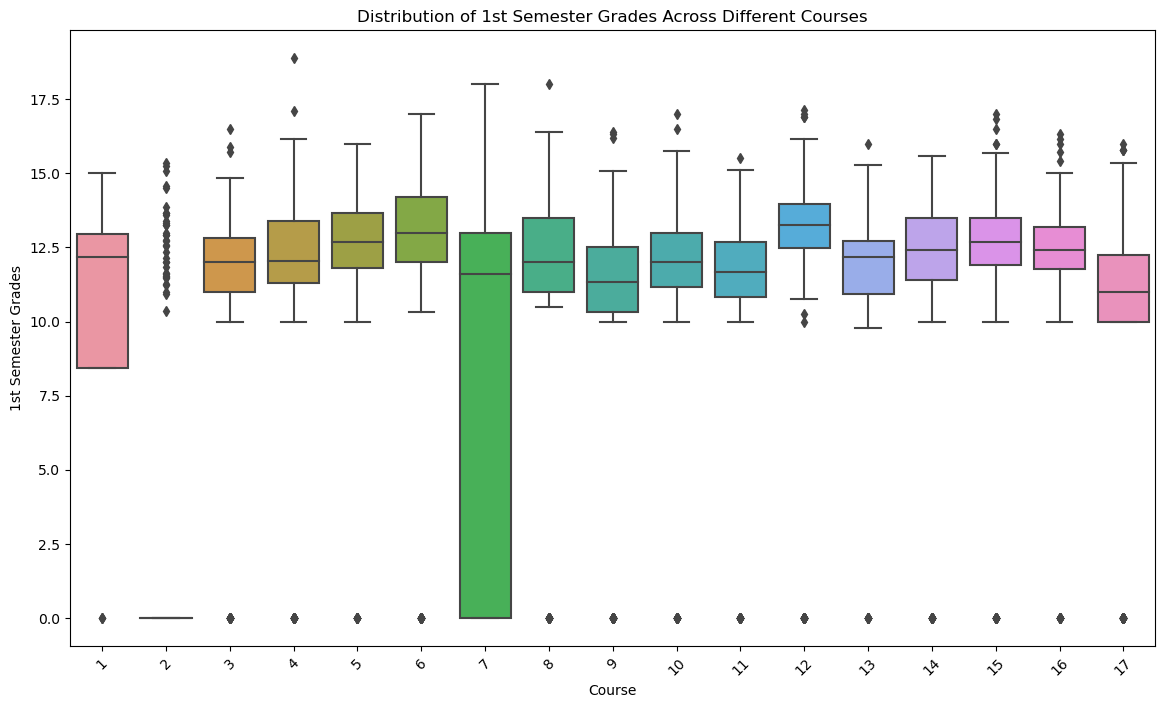

In [49]:
# Group data by 'Course' and get all 1st semester grades for each course
grades_by_course = data.groupby('Course')['Curricular units 1st sem (grade)']

# Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x='Course', y='Curricular units 1st sem (grade)', data=data)
plt.title('Distribution of 1st Semester Grades Across Different Courses')
plt.ylabel('1st Semester Grades')
plt.xlabel('Course')
plt.xticks(rotation=45)
plt.show()

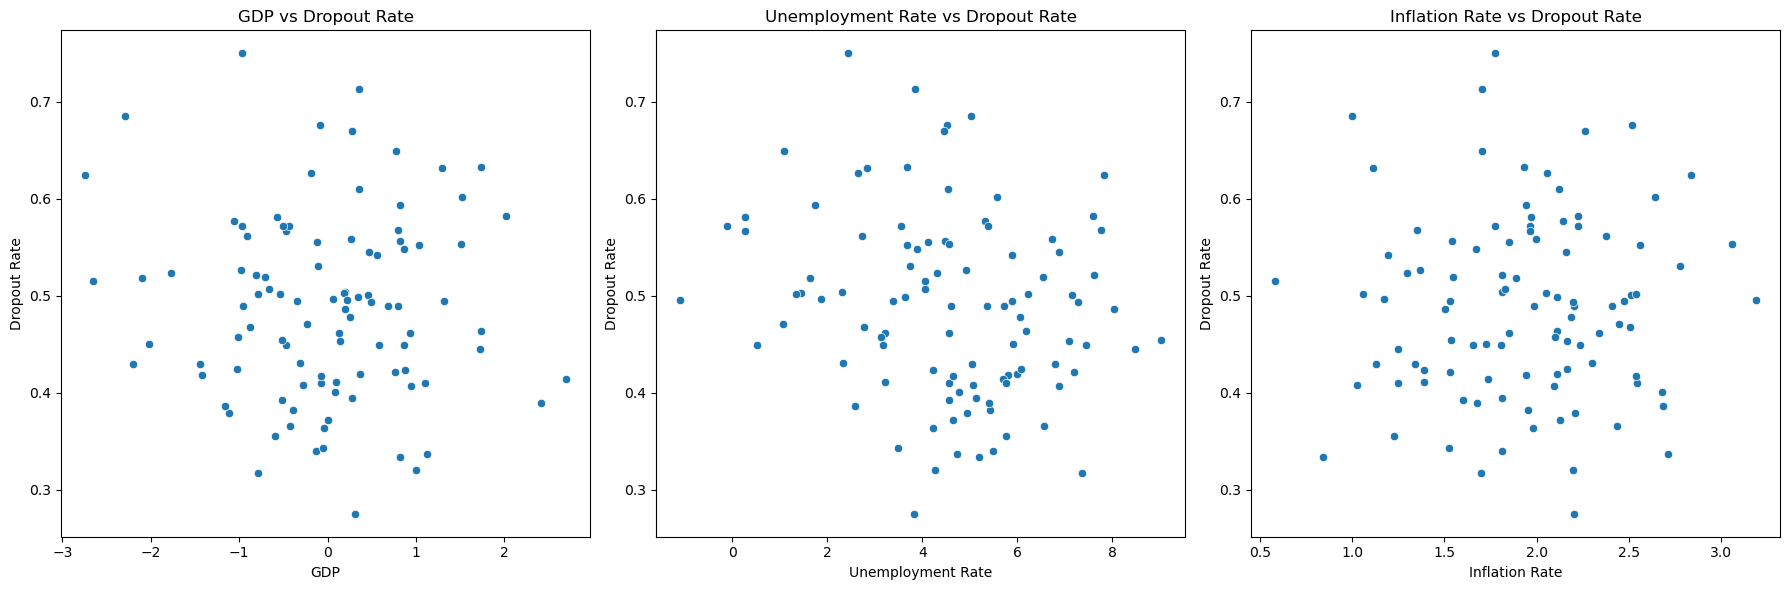

In [54]:
# Sample data creation
data_copy = pd.DataFrame({
    'GDP': np.random.normal(0, 1, 100),
    'Unemployment Rate': np.random.normal(5, 2, 100),
    'Inflation Rate': np.random.normal(2, 0.5, 100),
    'Dropout Rate': np.random.normal(0.5, 0.1, 100)
})

# Plotting
plt.figure(figsize=(18, 6))

# GDP vs Dropout Rate
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDP', y='Dropout Rate', data=data_copy)
plt.title('GDP vs Dropout Rate')
plt.xlabel('GDP')
plt.ylabel('Dropout Rate')

# Unemployment Rate vs Dropout Rate
plt.subplot(1, 3, 2)
sns.scatterplot(x='Unemployment Rate', y='Dropout Rate', data=data_copy)
plt.title('Unemployment Rate vs Dropout Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Dropout Rate')

# Inflation Rate vs Dropout Rate
plt.subplot(1, 3, 3)
sns.scatterplot(x='Inflation Rate', y='Dropout Rate', data=data_copy)
plt.title('Inflation Rate vs Dropout Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Dropout Rate')

plt.tight_layout()
plt.show()

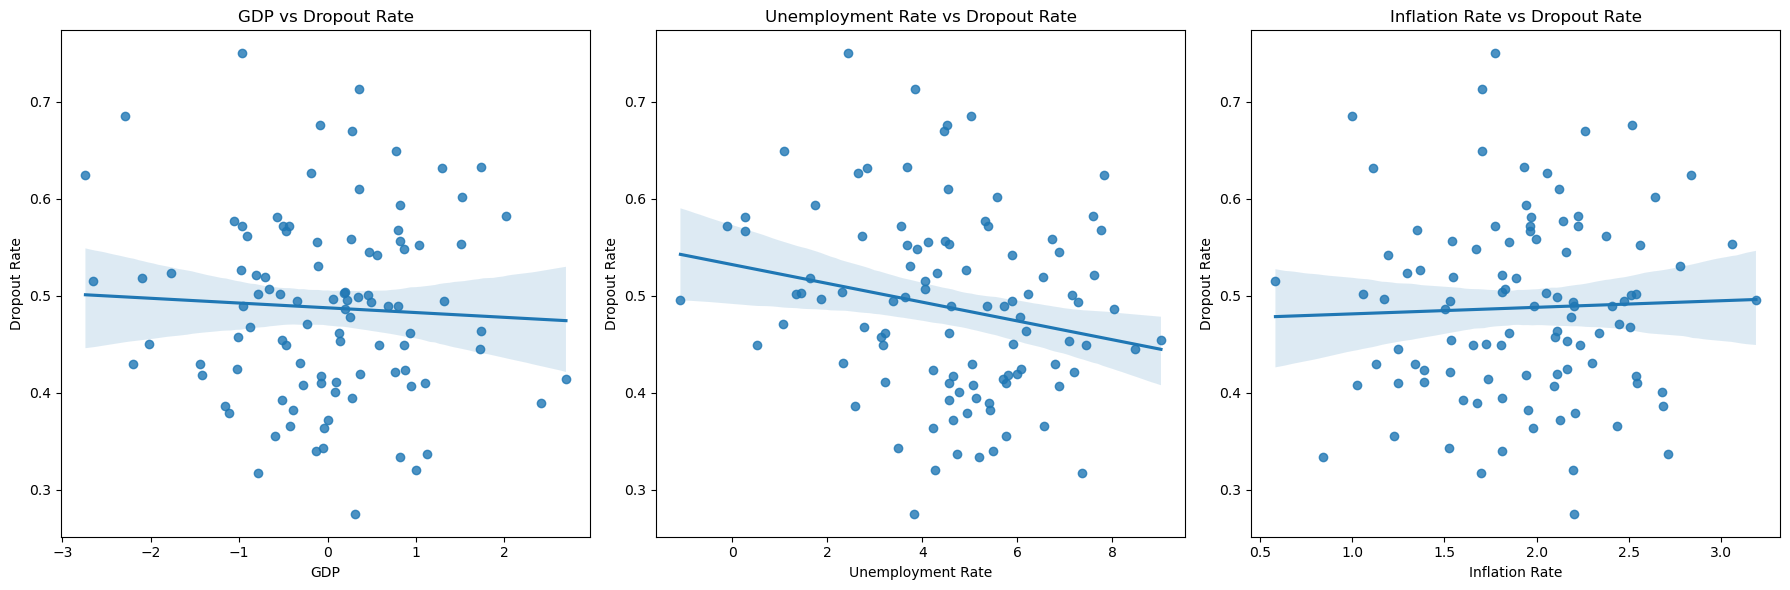

In [55]:
plt.figure(figsize=(18, 6))

# GDP vs Dropout Rate with regression line
plt.subplot(1, 3, 1)
sns.regplot(x='GDP', y='Dropout Rate', data=data_copy)
plt.title('GDP vs Dropout Rate')
plt.xlabel('GDP')
plt.ylabel('Dropout Rate')

# Unemployment Rate vs Dropout Rate with regression line
plt.subplot(1, 3, 2)
sns.regplot(x='Unemployment Rate', y='Dropout Rate', data=data_copy)
plt.title('Unemployment Rate vs Dropout Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Dropout Rate')

# Inflation Rate vs Dropout Rate with regression line
plt.subplot(1, 3, 3)
sns.regplot(x='Inflation Rate', y='Dropout Rate', data=data_copy)
plt.title('Inflation Rate vs Dropout Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Dropout Rate')

plt.tight_layout()
plt.show()

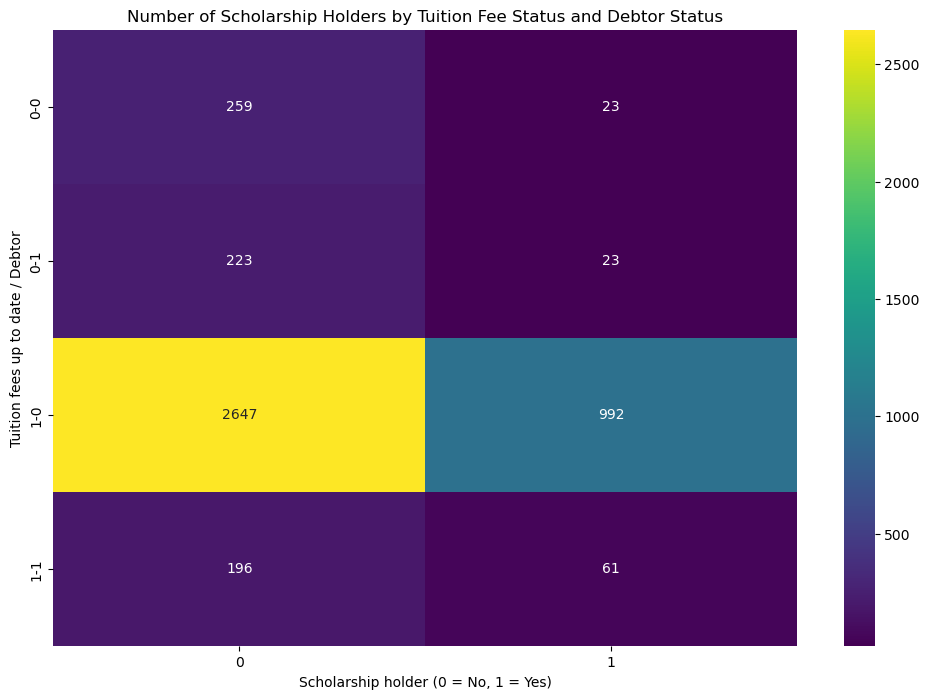

In [57]:
# Group data by 'Scholarship holder', 'Tuition fees up to date', and 'Debtor' and count the occurrences
scholarship_data = data.groupby(['Scholarship holder', 'Tuition fees up to date', 'Debtor']).size().reset_index(name='Count')

# Pivot the data for better visualization
pivot_table = scholarship_data.pivot_table(index=['Tuition fees up to date', 'Debtor'], columns='Scholarship holder', values='Count', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='viridis')
plt.title('Number of Scholarship Holders by Tuition Fee Status and Debtor Status')
plt.ylabel('Tuition fees up to date / Debtor')
plt.xlabel('Scholarship holder (0 = No, 1 = Yes)')
plt.show()